## **CNN Keras Tensorflow Project**

# Prashant Chopalli




Dataset is obtained from Kaggle dataset
https://www.kaggle.com/datasets/puneet6060/intel-image-classification

**Dataset Description**
The dataset consists of images Natural Scenes around the world.
This Data contains around 25k images of size 150x150 distributed under 6 categories.

*  Buildings 0
*  Forest 1
*  Glacier 2
*  Mountain 3
*  Sea 4
*  Street 5

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.

**Objective**
Build a Image Classification model to predict the class of the image; using Convolutional Neural Network to make MultiClass prediction

In [8]:
!pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Import Required Libraries
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import random
from shutil import copyfile
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
# Load the zip file from google drive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Unzip the file
!unzip gdrive/MyDrive/datasets/intel.zip

Archive:  gdrive/MyDrive/datasets/intel.zip
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
# List the directories
!ls

gdrive	sample_data  seg_pred  seg_test  seg_train


seg_train/seg_train/buildings/16681.jpg 

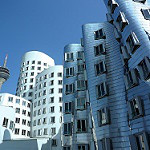

seg_train/seg_train/buildings/3645.jpg 

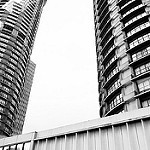

seg_train/seg_train/forest/6021.jpg 

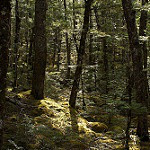

seg_train/seg_train/forest/7378.jpg 

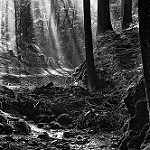

seg_train/seg_train/glacier/10468.jpg 

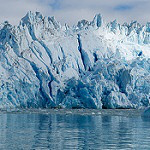

seg_train/seg_train/glacier/6279.jpg 

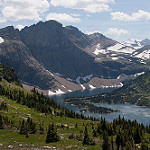

seg_train/seg_train/mountain/10623.jpg 

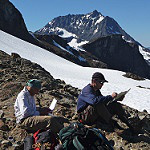

seg_train/seg_train/mountain/8692.jpg 

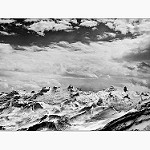

seg_train/seg_train/sea/5419.jpg 

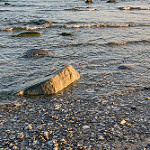

seg_train/seg_train/sea/18958.jpg 

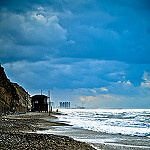

seg_train/seg_train/street/5354.jpg 

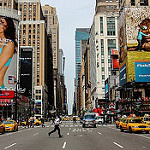

seg_train/seg_train/street/1121.jpg 

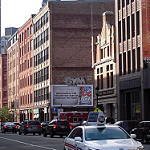

In [6]:
# display sample images from mountain class 
# img_dir="seg_train/seg_train/mountain"
# i = 0
# source=os.listdir(img_dir)
# while i < 5:
#   fname=os.path.join(img_dir,source[i])
#   print(fname, end=' ')
#   im=Image.open(fname)
#   im.show()
#   i = i +1

xlist= ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
for x in xlist:
    folder = x
    img_dir=os.path.join('seg_train/seg_train/'+ folder)
    i = 0
    source=os.listdir(img_dir)
    while i < 2:
        fname=os.path.join(img_dir,source[i])
        im=Image.open(fname)
        print(fname, end=' ')
        im.show()
        i = i +1

In [7]:
# Use the preprocessing ImageDataGenerator to create training generator from training set. 
# Rescale, set the batch size and image size to 150x150
train_generator = ImageDataGenerator(rescale=1.0/255.0)
tg=train_generator.flow_from_directory('seg_train/seg_train',batch_size=128,class_mode='categorical',target_size=(150,150))

Found 14034 images belonging to 6 classes.


In [8]:
# Use the preprocessing ImageDataGenerator to create validation generator from validtion set. 
# Rescale, set the batch size and image size to 150x150
validation_generator = ImageDataGenerator(rescale=1.0/255.0)
vg=validation_generator.flow_from_directory('seg_test/seg_test',batch_size=128,class_mode='categorical',target_size=(150,150))

Found 3000 images belonging to 6 classes.


In [9]:
# Build the model. Using 5 Convolution layer and 3 Max pooling layers. 2 FC layers of 128 and 64 nodes
# Output layers has 6 outputs
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
      tf.keras.layers.MaxPool2D(2,2),
      # tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2), 
      tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
      tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
      tf.keras.layers.MaxPool2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Dense(6,activation='softmax')
    
])

# Define the Callback function
class myCallback(tf.keras.callbacks.Callback):
        # Check after epoch end
        def on_epoch_end(self,epoch,logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.95:
                print("\nStopped as desried Validation Accuracy reached")             
                # Stop when accuracy is reached
                self.model.stop_training = True

callback =myCallback()

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [10]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 33, 33, 256)       2

In [11]:
# Fit the training data using 50 epochs, stop before 50 if desired accuracy is reached
history = model.fit(tg, epochs=50,verbose=1,callbacks = callback,validation_data=vg)

Epoch 1/50
  6/110 [>.............................] - ETA: 28s - loss: 1.9662 - accuracy: 0.1810

110/110 [==============================] - 68s 419ms/step - loss: 1.5115 - accuracy: 0.3752 - val_loss: 1.0717 - val_accuracy: 0.5747
Epoch 2/50
110/110 [==============================] - 37s 339ms/step - loss: 1.1637 - accuracy: 0.5415 - val_loss: 0.9746 - val_accuracy: 0.6273
Epoch 3/50
110/110 [==============================] - 38s 348ms/step - loss: 1.0357 - accuracy: 0.5868 - val_loss: 0.8637 - val_accuracy: 0.6460
Epoch 4/50
110/110 [==============================] - 38s 345ms/step - loss: 0.9592 - accuracy: 0.6208 - val_loss: 0.8118 - val_accuracy: 0.6697
Epoch 5/50
110/110 [==============================] - 38s 343ms/step - loss: 0.8941 - accuracy: 0.6403 - val_loss: 0.7579 - val_accuracy: 0.7080
Epoch 6/50
110/110 [==============================] - 41s 371ms/step - loss: 0.8336 - accuracy: 0.6736 - val_loss: 0.6931 - val_accuracy: 0.7443
Epoch 7/50
110/110 [==============================] - 37s 341ms/step - loss: 0.7631 - accuracy: 0.7090 - val_loss: 0.7100 - val_accuracy: 0.7

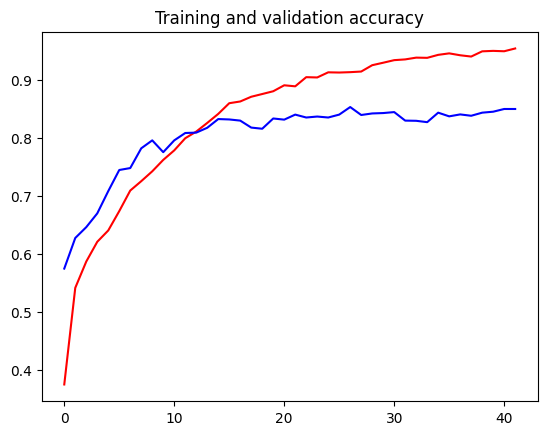

<Figure size 640x480 with 0 Axes>

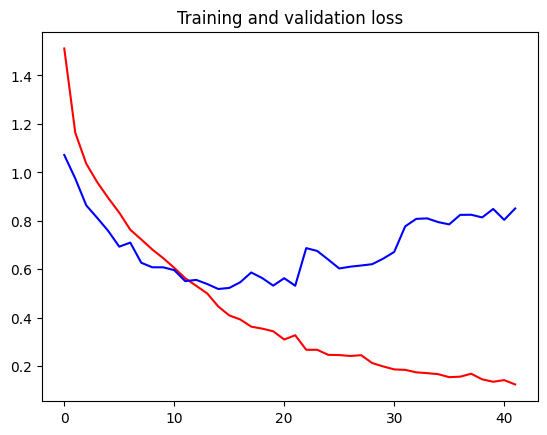

<Figure size 640x480 with 0 Axes>

In [12]:
# Plot the results for Training and Validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.show()

plt.title('Training and validation loss')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.figure()
plt.show()

Highest Validation accuracy reached ~ 84%

In [15]:
# Testing the model
from keras.preprocessing import image
import numpy as np
xdict= {'Buildings': 0, 'Forest': 1, 'Glacier': 2, 'Mountain': 3, 'Sea': 4, 'Street': 5}

# Test using the 5 random images image from test imageset
def test_model(imdir): 
    set=imdir
    print("Testing", imdir,"image")
    print("")
    fpath = os.path.join('seg_test/seg_test/' + set )
    fpath
    xlist=os.listdir(fpath)
    j = 0
    while j < 5:
          fname = os.path.join(fpath + '/' + random.choice(xlist))
          im=tf.keras.utils.load_img(fname, target_size=(150,150))
          im.show()
          img=tf.keras.utils.img_to_array(im)
          img=img/255
          testimg = np.expand_dims(img, axis=0)
          # test_image = np.vstack([testimg])
          # pred=model.predict(test_image,batch_size=10)
          pred=model.predict(testimg,batch_size=10)
          score=tf.nn.softmax(pred[0])
          for key,value in xdict.items():
              if value == np.argmax(score):
                  print("Predicted class is", key, np.argmax(score), "with a score of", np.max(score))
                  print("")
                  # print(np.argmax(score),np.max(score))
                  #  print('Class names for each image type: Buildings 0, Forest 1, Glacier 2, Mountain 3, Sea 4, Street 5')
          j = j+1

    return None




Testing glacier image



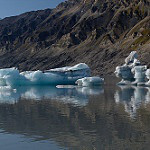

1/1 [==============================] - 0s 20ms/step
Predicted class is Glacier 2 with a score of 0.35199624



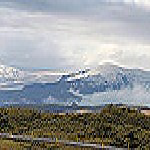

1/1 [==============================] - 0s 19ms/step
Predicted class is Mountain 3 with a score of 0.30271047



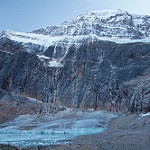

1/1 [==============================] - 0s 18ms/step
Predicted class is Glacier 2 with a score of 0.3521756



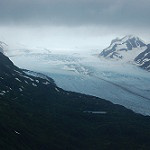

1/1 [==============================] - 0s 19ms/step
Predicted class is Glacier 2 with a score of 0.30651566



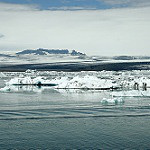

1/1 [==============================] - 0s 34ms/step
Predicted class is Sea 4 with a score of 0.3521874



In [17]:
# Testing images from Glacier dataset
test_model('glacier')

Testing mountain image



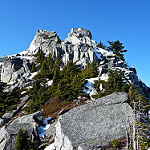

1/1 [==============================] - 0s 32ms/step
Predicted class is Mountain 3 with a score of 0.3486942



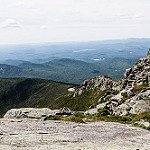

1/1 [==============================] - 0s 30ms/step
Predicted class is Mountain 3 with a score of 0.3185907



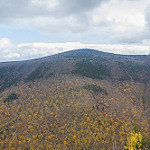

1/1 [==============================] - 0s 31ms/step
Predicted class is Mountain 3 with a score of 0.35218734



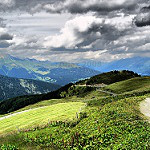

1/1 [==============================] - 0s 28ms/step
Predicted class is Mountain 3 with a score of 0.35121503



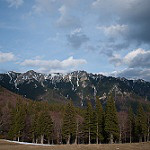

1/1 [==============================] - 0s 28ms/step
Predicted class is Mountain 3 with a score of 0.3521873



In [ ]:
# Testing images from Mountain dataset
test_model('mountain')

Testing sea image



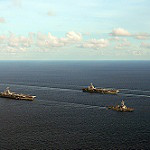

1/1 [==============================] - 0s 28ms/step
Predicted class is Sea 4 with a score of 0.35150018



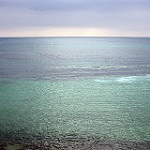

1/1 [==============================] - 0s 26ms/step
Predicted class is Sea 4 with a score of 0.35191956



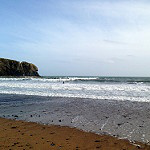

1/1 [==============================] - 0s 30ms/step
Predicted class is Sea 4 with a score of 0.35197347



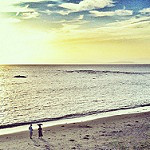

1/1 [==============================] - 0s 27ms/step
Predicted class is Sea 4 with a score of 0.3521874



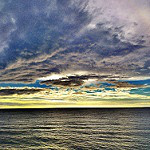

1/1 [==============================] - 0s 27ms/step
Predicted class is Glacier 2 with a score of 0.35168326



In [ ]:
# Testing images from Sea dataset
test_model('sea')

Testing buildings image



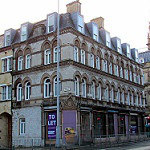

1/1 [==============================] - 0s 21ms/step
Predicted class is Buildings 0 with a score of 0.3521874



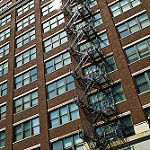

1/1 [==============================] - 0s 21ms/step
Predicted class is Forest 1 with a score of 0.35218683



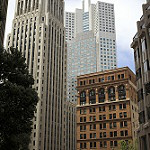

1/1 [==============================] - 0s 20ms/step
Predicted class is Street 5 with a score of 0.27263913



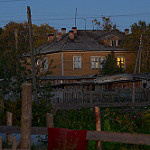

1/1 [==============================] - 0s 20ms/step
Predicted class is Buildings 0 with a score of 0.34282717



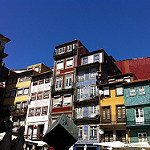

1/1 [==============================] - 0s 19ms/step
Predicted class is Buildings 0 with a score of 0.3521874



In [ ]:
# Testing images from Buildings dataset
test_model('buildings')

Testing street image



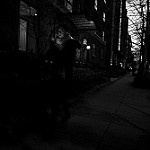

1/1 [==============================] - 0s 21ms/step
Predicted class is Forest 1 with a score of 0.3521873



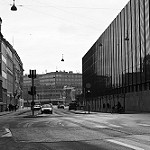

1/1 [==============================] - 0s 19ms/step
Predicted class is Street 5 with a score of 0.3521874



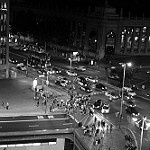

1/1 [==============================] - 0s 18ms/step
Predicted class is Street 5 with a score of 0.3521635



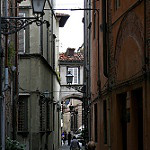

1/1 [==============================] - 0s 29ms/step
Predicted class is Street 5 with a score of 0.3521874



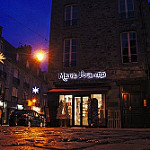

1/1 [==============================] - 0s 22ms/step
Predicted class is Buildings 0 with a score of 0.27422237



In [ ]:
# Testing images from Street dataset
test_model('street')

Testing forest image



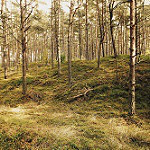

1/1 [==============================] - 0s 18ms/step
Predicted class is Forest 1 with a score of 0.3521874



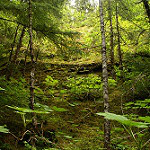

1/1 [==============================] - 0s 23ms/step
Predicted class is Forest 1 with a score of 0.35218692



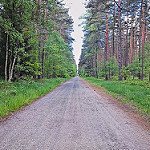

1/1 [==============================] - 0s 20ms/step
Predicted class is Forest 1 with a score of 0.34755835



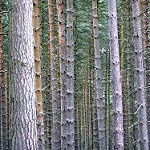

1/1 [==============================] - 0s 19ms/step
Predicted class is Forest 1 with a score of 0.3521874



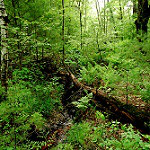

1/1 [==============================] - 0s 19ms/step
Predicted class is Forest 1 with a score of 0.3521874



In [ ]:
# Testing images from Forest dataset
test_model('forest')

In [23]:
# Testing the model with random images from Prediction dataset
from keras.preprocessing import image
import numpy as np
xdict= {'Buildings': 0, 'Forest': 1, 'Glacier': 2, 'Mountain': 3, 'Sea': 4, 'Street': 5}

# Test using the 5 random images image from predict imageset
def test_model(): 
    set='seg_pred'
    print("Testing image")
    print("")
    fpath = os.path.join('seg_pred/' + set )
    fpath
    xlist=os.listdir(fpath)
    j = 0
    while j < 5:
          fname = os.path.join(fpath + '/' + random.choice(xlist))
          im=tf.keras.utils.load_img(fname, target_size=(150,150))
          im.show()
          img=tf.keras.utils.img_to_array(im)
          img=img/255
          testimg = np.expand_dims(img, axis=0)
          pred=model.predict(testimg,batch_size=10)
          score=tf.nn.softmax(pred[0])
          for key,value in xdict.items():
              if value == np.argmax(score):
                  print("Predicted class is", key, np.argmax(score), "with a score of", np.max(score))
                  print("")

          j = j+1

    return None

Testing image



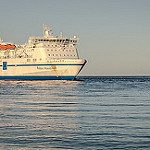

1/1 [==============================] - 0s 20ms/step
Predicted class is Sea 4 with a score of 0.3521874



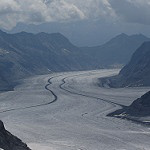

1/1 [==============================] - 0s 18ms/step
Predicted class is Glacier 2 with a score of 0.32498044



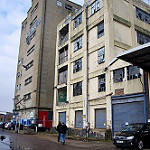

1/1 [==============================] - 0s 20ms/step
Predicted class is Buildings 0 with a score of 0.3521874



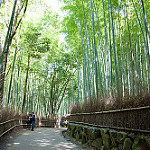

1/1 [==============================] - 0s 17ms/step
Predicted class is Forest 1 with a score of 0.3521874



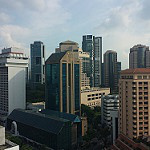

1/1 [==============================] - 0s 20ms/step
Predicted class is Buildings 0 with a score of 0.35218516



In [31]:
test_model()